In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [37]:
df = pd.read_csv('ind.csv')

In [38]:
df.head()

,Date,Temperature_C,pH,Turbidity_NTU,TDS_mg_L,Conductivity_uS_cm,DO_mg_L,BOD_mg_L,Salinity_ppt,Anomaly_Type
0,2024-01-01,29.664283,8.187522,28.000970,863.725521,987.597726,4.946232,13.646083,2.409275,Normal
1,2024-01-02,31.911415,6.753640,23.307607,1256.538583,1324.440471,3.173277,16.880047,2.351577,Normal
2,2024-01-03,28.802259,6.236391,27.531944,757.365458,1276.267272,2.239947,9.864705,2.318530,Normal
3,2024-01-04,28.861437,7.895962,20.507732,1193.509837,1692.253124,2.269477,15.742468,1.524340,Normal
4,2024-01-05,29.167469,7.515035,16.588710,539.711208,1496.884568,3.772261,7.031283,1.220284,Normal


In [39]:
sns.set_style('whitegrid')
pd.to_datetime(df['Date'])

0     2024-01-01
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
360   2024-12-26
361   2024-12-27
362   2024-12-28
363   2024-12-29
364   2024-12-30
Name: Date, Length: 365, dtype: datetime64[ns]

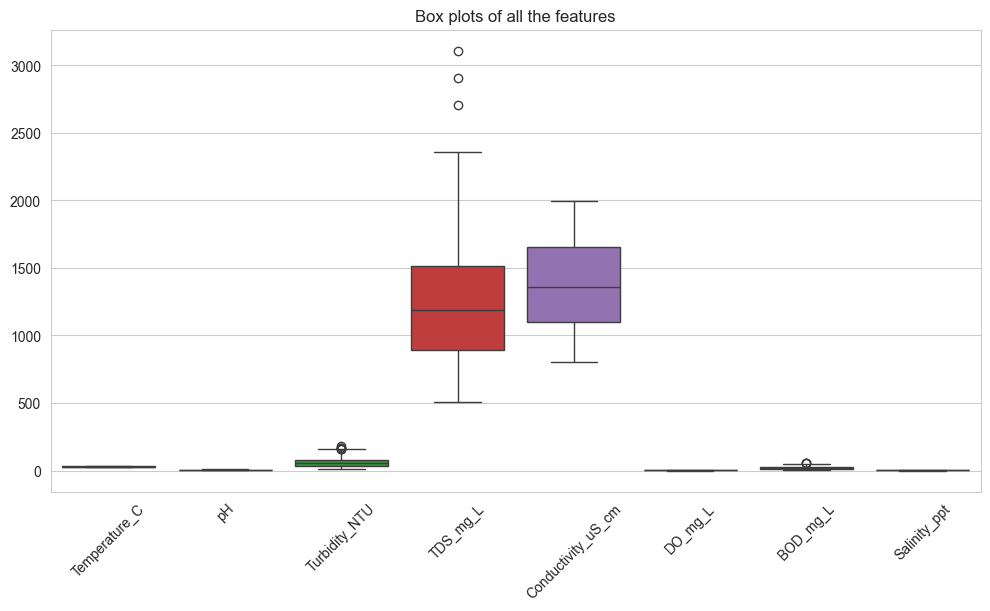

In [40]:
# Box plots to make sure there are some outliers we wont remove jsut want to make sure the outliers do align with all the other parameters
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Date','Anomaly_Type']))
plt.xticks(rotation=45)
plt.title('Box plots of all the features')
plt.show()

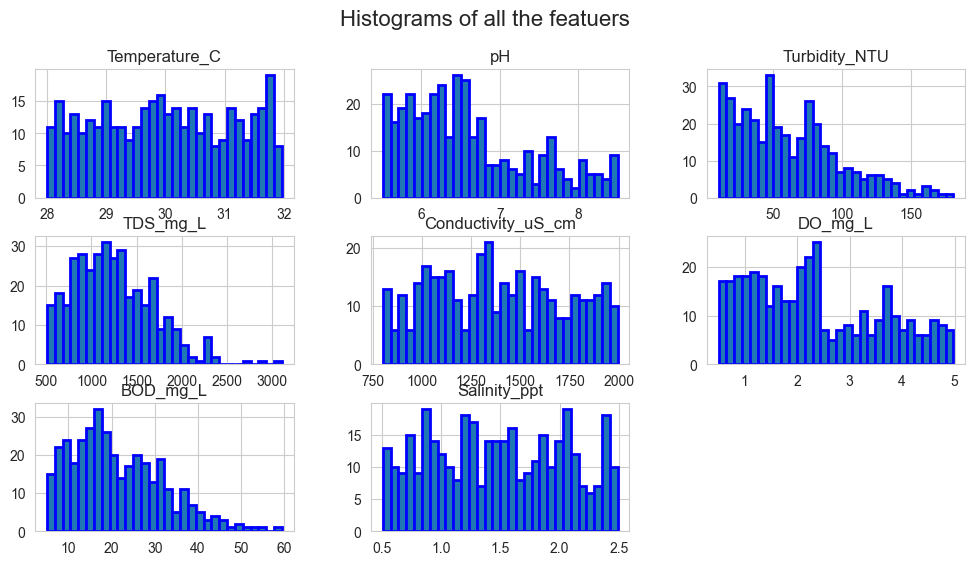

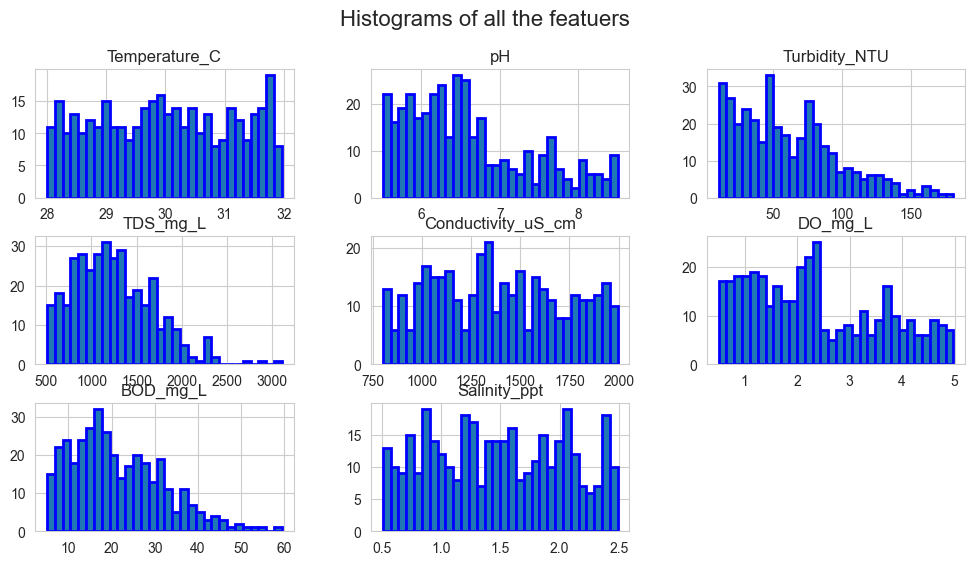

In [41]:
# creating hitograms and KDE;s
df.drop(columns=['Date','Anomaly_Type']).hist(figsize=(12,6),bins=30,edgecolor='blue',linewidth=2.0)
plt.suptitle("Histograms of all the featuers",fontsize=16)
plt.show(0)

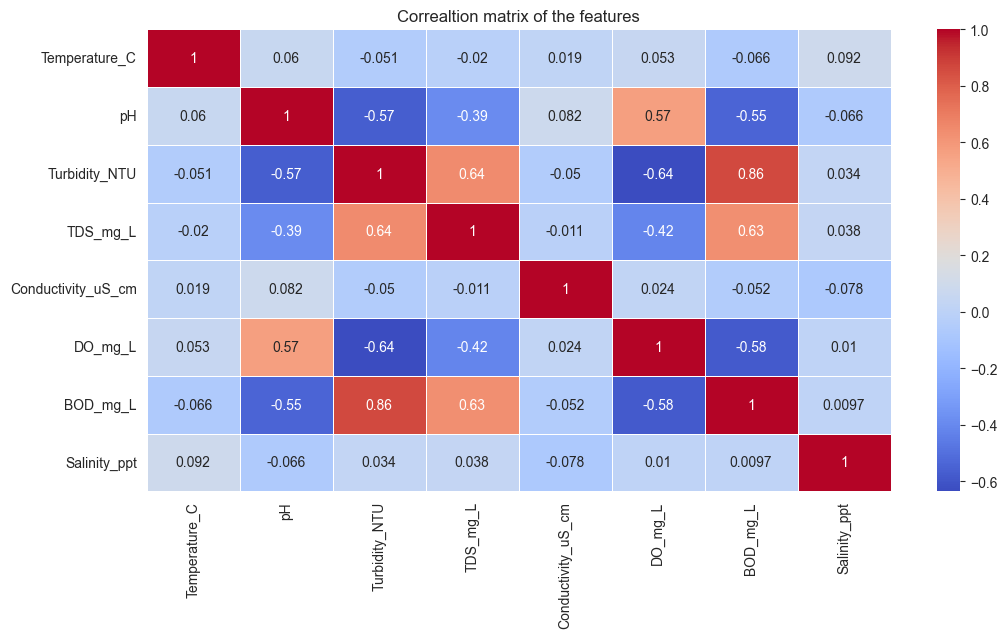

In [42]:
plt.figure(figsize=(12,6))
corr_matrix = df.drop(columns=['Date','Anomaly_Type']).corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correaltion matrix of the features')
plt.show()

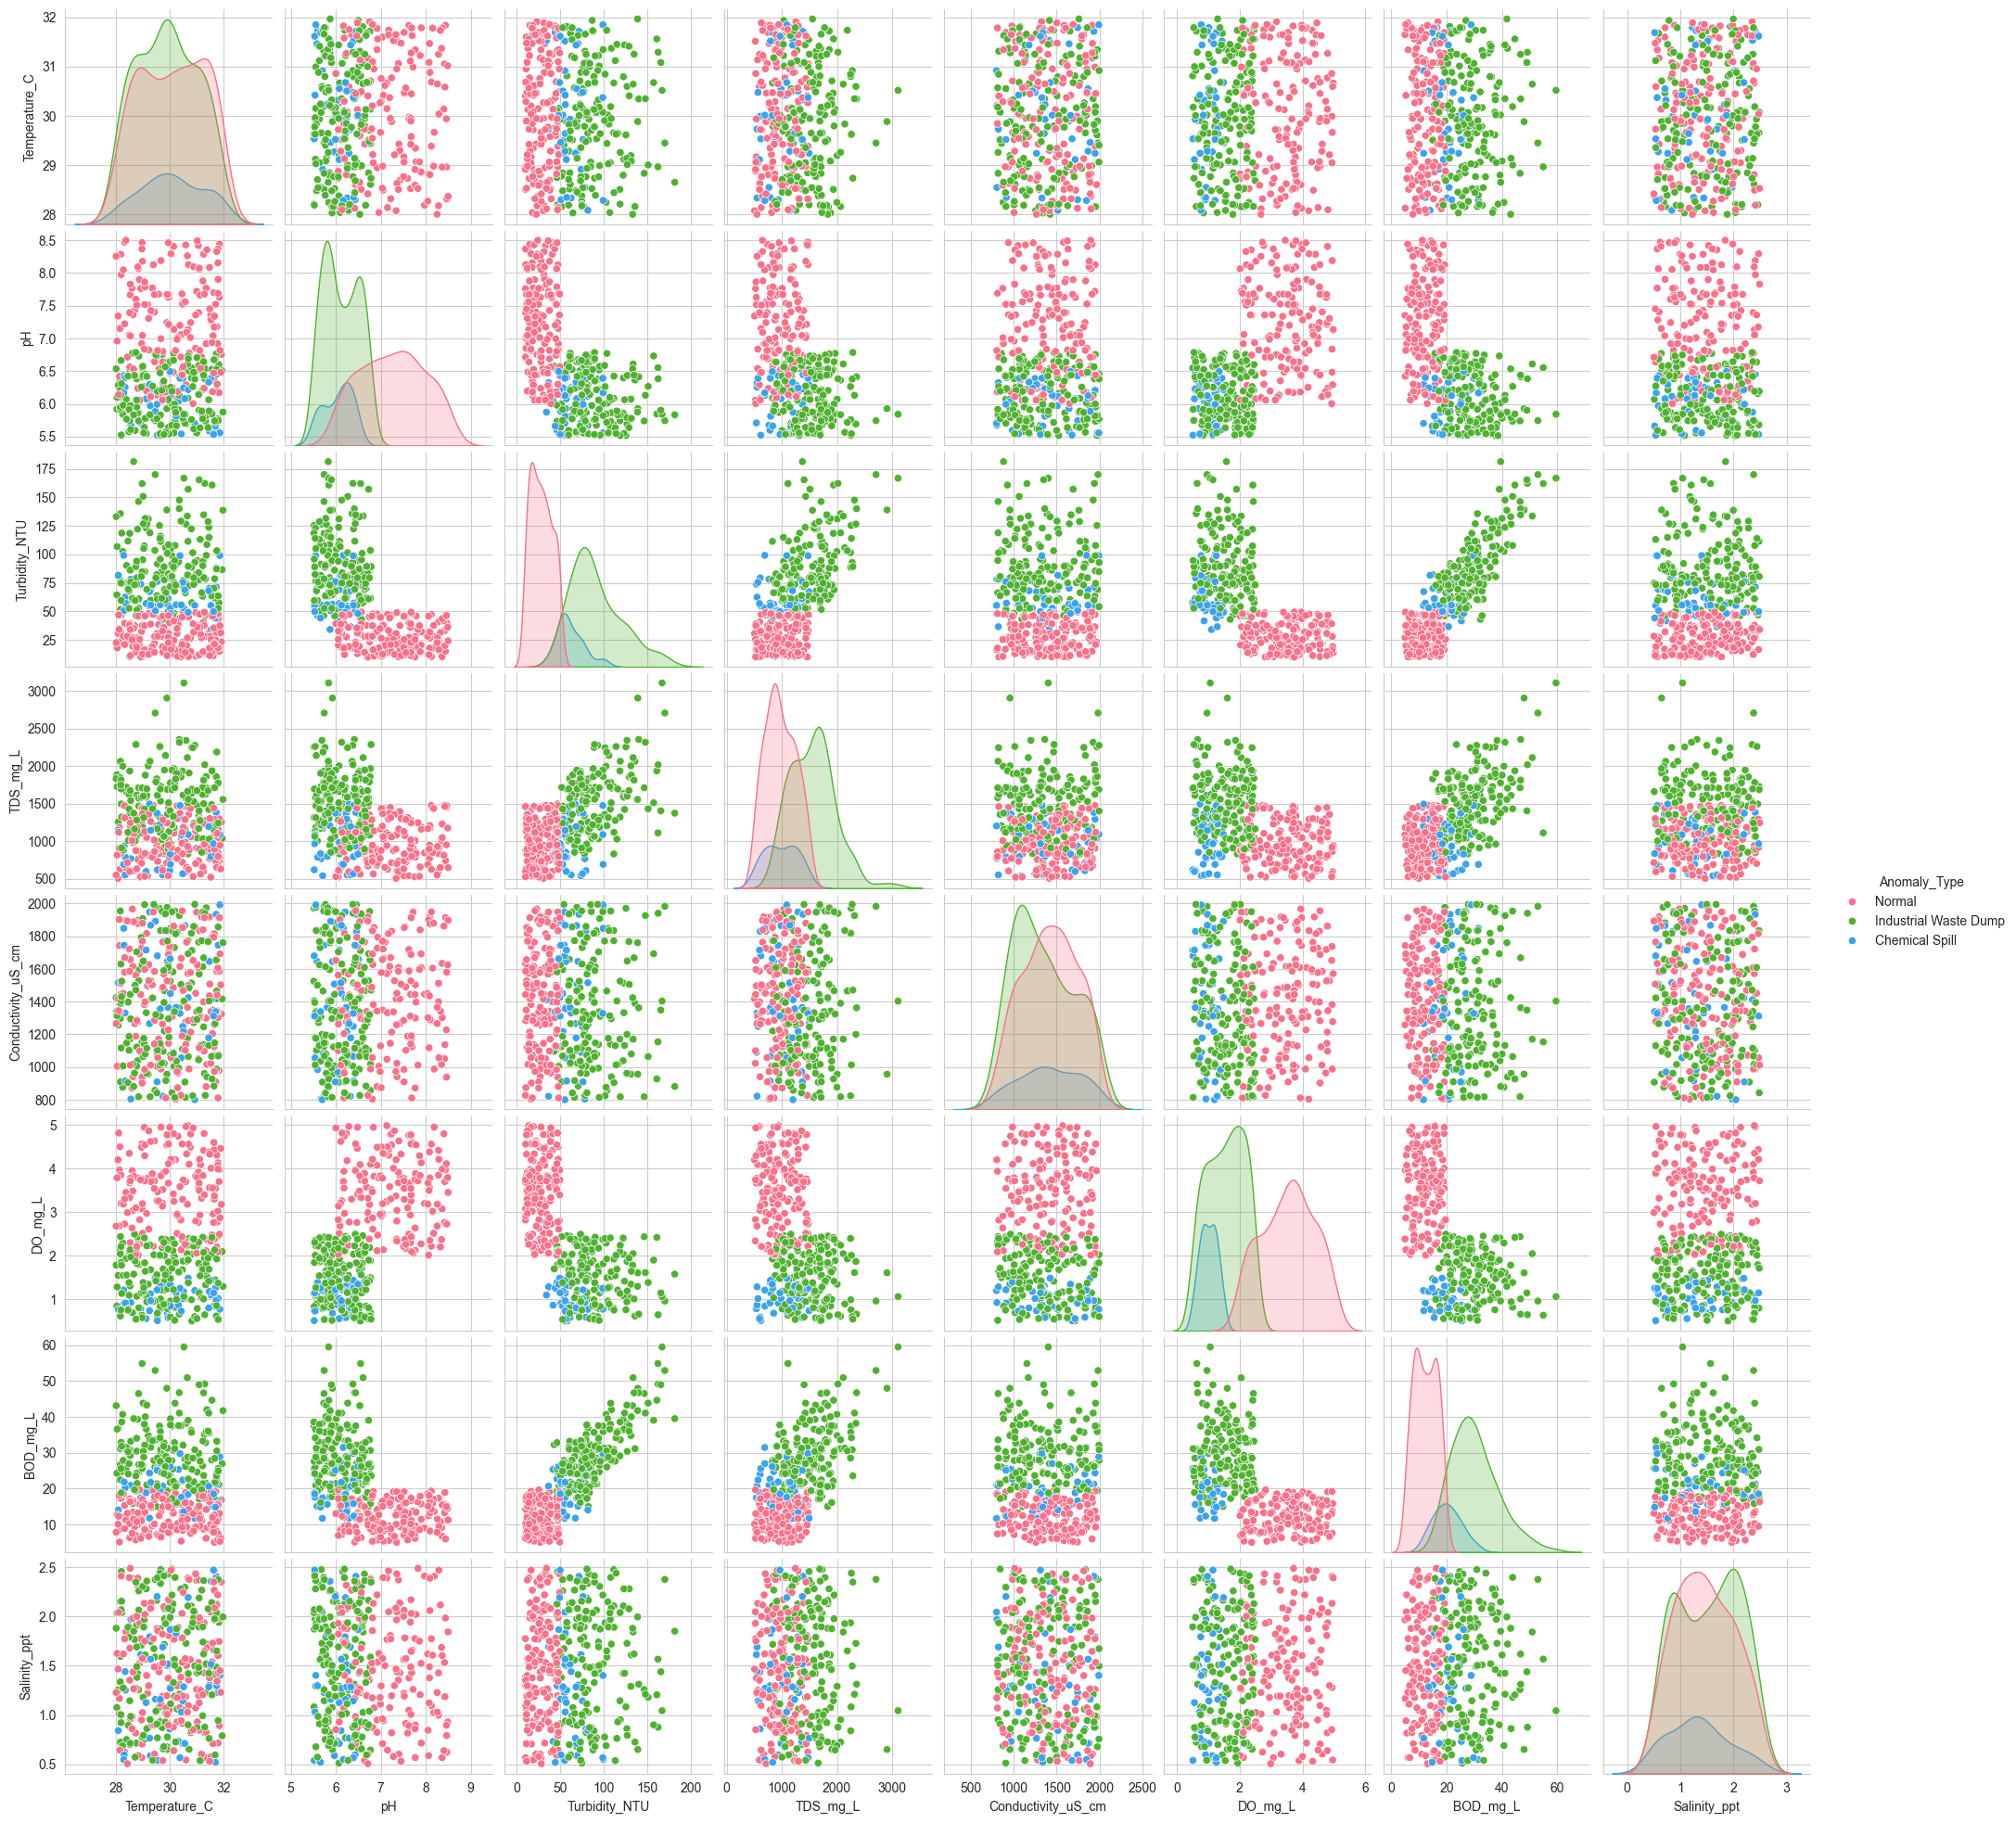

In [43]:
sns.pairplot(df, hue="Anomaly_Type", diag_kind="kde", palette="husl")
plt.show()

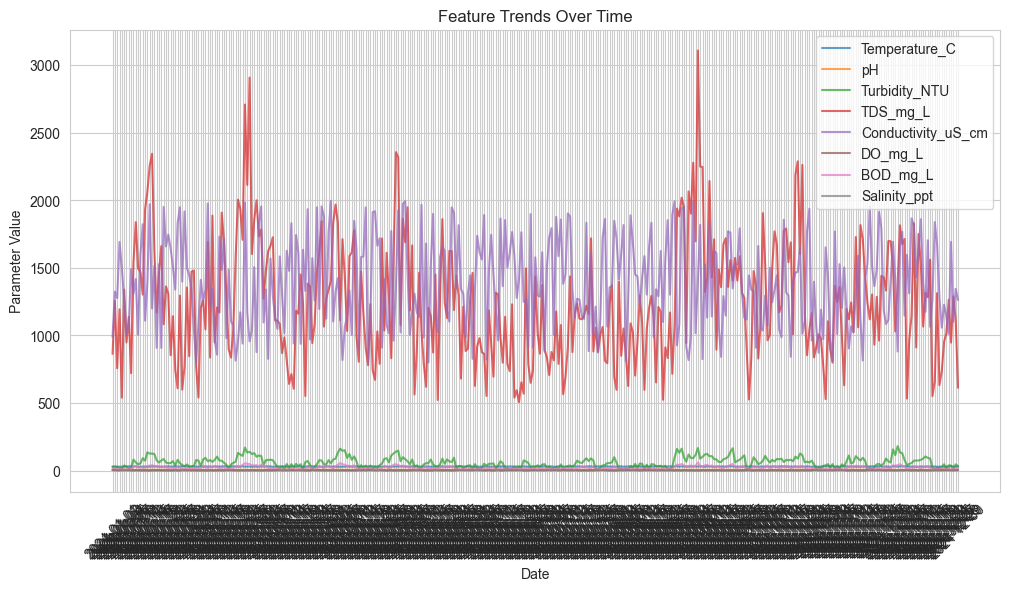

In [44]:
#Line plot to make sure to see the feature trends 
plt.figure(figsize=(12, 6))
for col in df.drop(columns=["Date", "Anomaly_Type"]).columns:
    plt.plot(df["Date"], df[col], label=col, alpha=0.7)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Parameter Value")
plt.title("Feature Trends Over Time")
plt.xticks(rotation=45)
plt.show()
# differebt water quality features are plotted over time 
# TDS and conductiivty seem to have large fluctuations 
# turbidity is relativeily stable but has a periodic peaks
# DO and BOD appear to have lower values 
#High correlation between TDS and Conductivity (both show similar patterns).
#Sharp spikes at certain points, indicating potential anomalies (e.g., sudden increase in TDS or Conductivity could indicate contamination).
#pH and Temperature are less volatile, meaning they change gradually over time.
#The data appears to be noisy, so smoothing techniques (e.g., moving averages) could be useful for better interpretation.

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [46]:
label_encoder = LabelEncoder()
df['Anomaly_Type'] = label_encoder.fit_transform(df['Anomaly_Type'])

In [47]:
df.head()

,Date,Temperature_C,pH,Turbidity_NTU,TDS_mg_L,Conductivity_uS_cm,DO_mg_L,BOD_mg_L,Salinity_ppt,Anomaly_Type
0,2024-01-01,29.664283,8.187522,28.000970,863.725521,987.597726,4.946232,13.646083,2.409275,2
1,2024-01-02,31.911415,6.753640,23.307607,1256.538583,1324.440471,3.173277,16.880047,2.351577,2
2,2024-01-03,28.802259,6.236391,27.531944,757.365458,1276.267272,2.239947,9.864705,2.318530,2
3,2024-01-04,28.861437,7.895962,20.507732,1193.509837,1692.253124,2.269477,15.742468,1.524340,2
4,2024-01-05,29.167469,7.515035,16.588710,539.711208,1496.884568,3.772261,7.031283,1.220284,2


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [49]:
df = df.select_dtypes(include=[np.number]) # only including numeric columns leave the non numeric columns 
df
# thus the datetime cplumn would be

,Temperature_C,pH,Turbidity_NTU,TDS_mg_L,Conductivity_uS_cm,DO_mg_L,BOD_mg_L,Salinity_ppt,Anomaly_Type
0,29.664283,8.187522,28.000970,863.725521,987.597726,4.946232,13.646083,2.409275,2
1,31.911415,6.753640,23.307607,1256.538583,1324.440471,3.173277,16.880047,2.351577,2
2,28.802259,6.236391,27.531944,757.365458,1276.267272,2.239947,9.864705,2.318530,2
3,28.861437,7.895962,20.507732,1193.509837,1692.253124,2.269477,15.742468,1.524340,2
4,29.167469,7.515035,16.588710,539.711208,1496.884568,3.772261,7.031283,1.220284,2
...,...,...,...,...,...,...,...,...,...
360,29.282849,6.109617,38.810717,1263.610480,1011.307146,4.616318,15.255493,2.083280,2
361,31.855664,6.816555,37.491320,947.332427,1691.999496,2.866811,5.295248,1.451408,2
362,30.566319,7.558286,13.830168,1289.864621,1102.483864,2.258748,16.034640,1.573247,2
363,28.093732,6.140833,46.902896,1118.346307,1345.000964,4.809697,12.305241,2.042272,2


In [50]:
scaler = StandardScaler()
X = df.drop(columns=['Anomaly_Type'])
y = df['Anomaly_Type']
X_scaled = scaler.fit_transform(X)


In [51]:
print(X_scaled.shape)
y.shape


(365, 8)


(365,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train , X_test ,y_train , y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 42)

model = Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64,activation ='relu'),
    Dropout(0.2),
    Dense(32,activation ='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_),activation ='softmax')
    ])

c:\Users\Aarya-2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
print(X_train.shape)
y_train.shape

(292, 8)


(292,)

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train , y_train , epochs = 50 , batch_size=32, validation_data=(X_test,y_test))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5185 - loss: 1.0383 - val_accuracy: 0.9452 - val_loss: 0.7578
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.7504 - val_accuracy: 0.9452 - val_loss: 0.4731
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8739 - loss: 0.5228 - val_accuracy: 0.9452 - val_loss: 0.2905
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8409 - loss: 0.4326 - val_accuracy: 0.9452 - val_loss: 0.2084
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9040 - loss: 0.2739 - val_accuracy: 0.9452 - val_loss: 0.1663
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8720 - loss: 0.2889 - val_accuracy: 0.9452 - val_loss: 0.1511
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9103 - loss: 0.2357 - val_accuracy: 0.9589 - val_loss: 0.1412
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9336 - loss: 0.2075 - val_accuracy: 0.9589 - val_los

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

In [60]:
xgb_model = xgb.XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,random_state=42)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
xgb_preds = xgb_model.predict_proba(X_test)[:,1]
# predicts the probability that the a particular category is being called 


In [62]:
xgb_preds = xgb_preds.reshape(-1,1)
# reshape it into the 1d array by falttening the requred data 

In [63]:
nn_prds = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [64]:
stacked_preds = np.hstack((xgb_preds,nn_prds))


In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np


In [66]:
svm_meta_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True, class_weight='balanced'))
svm_meta_model.fit(stacked_preds, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear',
                     probability=True))])

In [67]:
final_preds = svm_meta_model.predict(stacked_preds)


In [68]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, final_preds)
print(f"Final Stacked Model Accuracy with SVM: {accuracy:.4f}")
print(classification_report(y_test, final_preds, target_names=label_encoder.classes_))

Final Stacked Model Accuracy with SVM: 0.9589
                       precision    recall  f1-score   support

       Chemical Spill       0.60      0.75      0.67         4
Industrial Waste Dump       0.97      0.94      0.96        34
               Normal       1.00      1.00      1.00        35

             accuracy                           0.96        73
            macro avg       0.86      0.90      0.87        73
         weighted avg       0.96      0.96      0.96        73



In [69]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_meta_model, stacked_preds, y_test, cv=5)
print(f"Cross-Validation Accuracy for SVM Meta-Model: {cv_scores.mean():.4f}")

Cross-Validation Accuracy for SVM Meta-Model: 0.9590


c:\Users\Aarya-2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
